# <center> World Wide Wine Classifier </center>

Ian Kollipara

CS 392 Seminar in Data Science

April 28. 2022
<hr>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
plt.style.use("ggplot")
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import explained_variance_score, make_scorer
from sklearn.preprocessing import minmax_scale

In [2]:
df = pd.read_csv("WhiteWine.csv", sep=";")

<hr>

## Data Exploration

A key aspect to note in any dataset is the distribution of targets. In this case, this is the distribution of White Wine ratings.

Text(0.5, 1.0, 'Distribution of White Wine Quality Ratings')

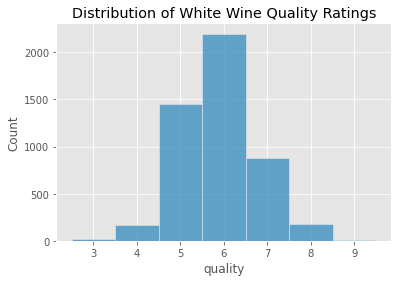

In [4]:
sns.histplot(df, x="quality", discrete=True)
plt.title("Distribution of White Wine Quality Ratings")

As this shows, our distribution is far more normal than the last, with far less 9's and a ton more 5 and 6's.
### Correlations
A key factor in determining metrics which help classify the wine is identifying correlating elements.

In [161]:
print("               Pearson")
print(df.corrwith(df["quality"]).sort_values().head(5))
print()
print("              Spearman")
print(df.corrwith(df["quality"], method="spearman").sort_values().head(5))

               Pearson
density                -0.307123
chlorides              -0.209934
volatile acidity       -0.194723
total sulfur dioxide   -0.174737
fixed acidity          -0.113663
dtype: float64

              Spearman
density                -0.348351
chlorides              -0.314488
total sulfur dioxide   -0.196680
volatile acidity       -0.196562
fixed acidity          -0.084485
dtype: float64


From this we can see that only alcohol is somewhat correlated with quality. However, these metrics are skewed due to quality being a discrete value. We can get a better sense of the true correlation by graphing it.

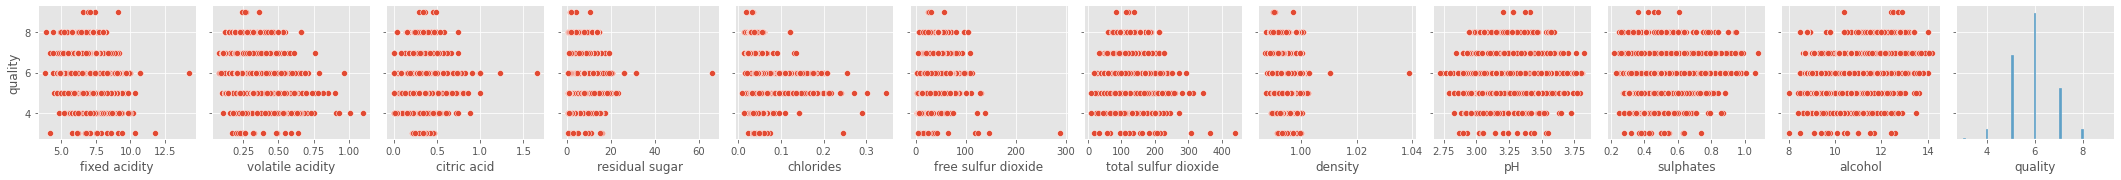

In [44]:
sns.pairplot(df, y_vars=["quality"])

Much of these found, or rather hinted at, correlations agree with my research in the previous notebook.
## Preprocessing

In [184]:
X = df[["chlorides", "alcohol", "volatile acidity"]]# "fixed acidity", "total sulfur dioxide"]]
y = df["quality"]

### Train Test Split

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X.apply(zscore), y)

## Regression
Regression is a task far more suited to this type of prediction, rather than binary classification. These targets are numbers, and therefore can be predicted on a graph. We don't have the full range of values however, so we cannot predict if something is a 10 or less than 2.
### Ridge
Ridge, or commonly called $l_2$ is a linear regression model based on optimizing this function:
$$||y - Xw||^2_2 + \alpha ||w||^2_2$$

In [186]:
%%time

param_grid = {"alpha": [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 1.5, 2]}

ridge_grid = GridSearchCV(Ridge(), param_grid, scoring=make_scorer(explained_variance_score), n_jobs=-1).fit(X_train, y_train)

print("Best Score")
print(ridge_grid.best_score_)
print()
print("Best Params")
print(ridge_grid.best_params_)
print()
ridge_model = ridge_grid.best_estimator_

Best Score
0.23540026296321664

Best Params
{'alpha': 2}

CPU times: user 44.9 ms, sys: 1.79 ms, total: 46.7 ms
Wall time: 88.3 ms


In [187]:
# yz_pred = np.array([round(r) for r in ridge_model.predict(Xz_test)])
y_pred = ridge_model.predict(X_test)
print(y_pred)

[5.90222636 6.18805146 5.3751667  ... 5.39291179 5.64545451 6.53158029]


In [188]:
explained_variance_score(y_test, y_pred)

0.2475589577230829

In [189]:
%%time

param_grid = {"alpha": [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 1.5, 2]}

lasso_grid = GridSearchCV(Lasso(), param_grid, scoring=make_scorer(explained_variance_score), n_jobs=-1).fit(X_train, y_train)

print("Best Score")
print(lasso_grid.best_score_)
print()
print("Best Params")
print(lasso_grid.best_params_)
print()
lasso_model = lasso_grid.best_estimator_

Best Score
0.23540331519295815

Best Params
{'alpha': 0.001}

CPU times: user 49.2 ms, sys: 3.33 ms, total: 52.5 ms
Wall time: 92.1 ms


In [190]:
y_pred = lasso_model.predict(X_test)
print(y_pred)

[5.90263334 6.18720048 5.37573931 ... 5.39332469 5.64491255 6.53040957]


In [191]:
explained_variance_score(y_test, y_pred)

0.24755059043456396